# Assignment 2: Linear regression 

This assignment aims at familiarizing you with the use of Linear Regression model supported by scikit-learn. You will have to do:

1.  **(5 points) Coding Tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Analyze the dataset using libraries like Pandas and Matplotlib.  
    1.2 *(1 point)* Preprocess the data for modeling.  
    1.3 *(1 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  
    1.4 *(1 point)* Train a Linear Regression model on the training set.    
    1.5 *(1 point)* Evaluate the model performance on the test set.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Does income or income stability have a stronger influence on the loan sanction amount? For example, analyze the data to see if a higher income or a "High" income stability rating leads to a greater loan approval amount.  
    2.2 *(1 point)* Is there a significant difference in loan amounts based on property location? For example, compare the average loan amounts for properties in rural, urban, and semi-urban locations.  
    2.3 *(1 point)* Is there a gender bias in loan approvals? For example, investigate if there is a difference in average loan amounts offered to male and female applicants.  
    2.4 *(1 point)* Are there any new features you could create from the existing data (e.g., loan-to-value ratio) that might be useful for analyzing loan amounts?  
    2.5 *(1 point)* Beyond loan amount prediction, what other insights can be extracted or predicted from this dataset? For example, explore possibilities of using the data to understand borrower behavior, property market trends, or develop targeted marketing strategies.  


The dataset you will be working on is 'house-loan.csv'. It is composed of attributes such as gender, age, income, etc. This dataset is to predict the loan amount for which a customer can request a bank with his/her collateral house.

In [ ]:
import numpy as np
import pandas as pd

This is a dataset about loan amount for which a customer can request a bank with his/her collateral house.

* Gender: Gender of customer requesting for a loan ('F' or 'M').
* Age: Age of customer requesting for a loan (non-negative values).
* Income (USD): Income of customer requesting for a loan (non-negative values).
* Income Stability: Income stability of customer requesting for a loan ("Low" or "High").
* Property Age: Age of the property (non-negative number of days).
* Property Location: Location of the property ("Rural", "Urban", and "Semi-Urban").
* Property Price: Price of the property (USD).
* Loan Sanction Amount (USD): Amount of loan the customer can request for (USD, target value).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load and display data
data = pd.read_csv('/content/drive/MyDrive/house_loan.csv')
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


## 1. Coding tasks

1.1 *(1 point)* Analyze the dataset using libraries like Pandas and Matplotlib.  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

                Age  Income (USD)  Property Age  Property Price  \
count  47297.000000  47265.000000  47263.000000    4.729700e+04   
mean      40.000063   2586.684384   2586.611058    1.350880e+05   
std       16.086128   1558.768809   1558.842286    9.457875e+04   
min       18.000000    372.700000    370.700000    7.859620e+03   
25%       24.000000   1653.740000   1652.820000    6.250408e+04   
50%       40.000000   2245.480000   2244.810000    1.130936e+05   
75%       55.000000   3128.560000   3128.380000    1.819546e+05   
max       65.000000  54662.750000  54647.750000    1.077967e+06   

       Loan Sanction Amount (USD)  
count                47297.000000  
mean                 46487.229765  
std                  32549.905634  
min                    254.586578  
25%                  21782.822159  
50%                  38822.132402  
75%                  62612.236905  
max                 366131.165218  


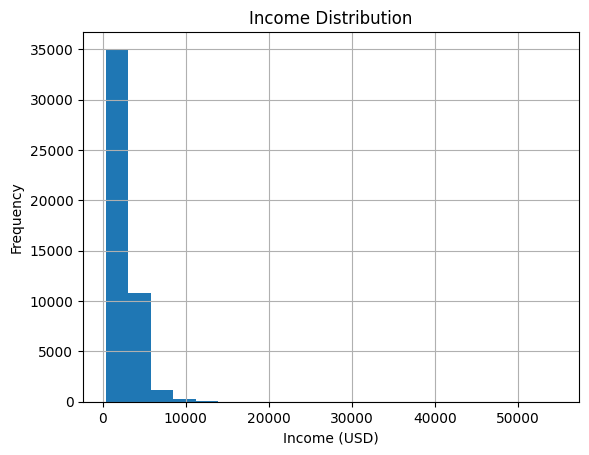

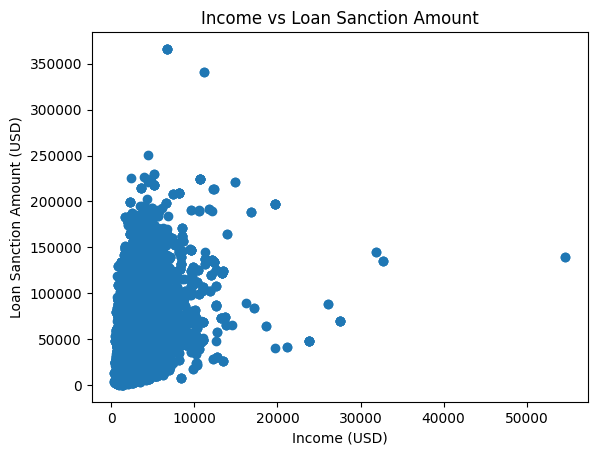

In [ ]:
# 1.1
print(data.describe())

# Histogram for 'Income (USD)'
data['Income (USD)'].hist(bins=20)
plt.title('Income Distribution')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for 'Income (USD)' vs 'Loan Sanction Amount (USD)'
plt.scatter(data['Income (USD)'], data['Loan Sanction Amount (USD)'])
plt.title('Income vs Loan Sanction Amount')
plt.xlabel('Income (USD)')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

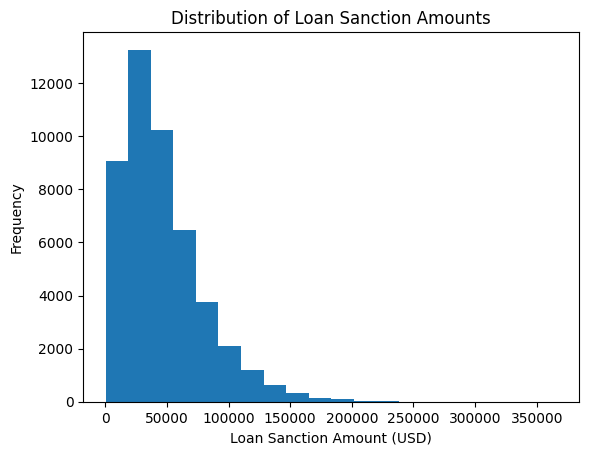

In [ ]:
plt.hist(data['Loan Sanction Amount (USD)'], bins=20)
plt.title('Distribution of Loan Sanction Amounts')
plt.xlabel('Loan Sanction Amount (USD)')
plt.ylabel('Frequency')
plt.show()

1.2 *(1 point)* Preprocess the data for modeling.

In [ ]:
# 1.2
data = data.dropna()  # Drop rows with missing values

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Gender', 'Income Stability', 'Property Location'], drop_first=True)

# Step 4: Define features (X) and target (y)
X = data.drop(['Loan Sanction Amount (USD)'], axis=1)  # Features
y = data['Loan Sanction Amount (USD)']  # Target variable

1.3 *(1 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.

In [ ]:
# 1.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    # Split the data into two subsets for training and testing.
print('Training:' + str(X_train.shape))     # Count data samples in Training set.
print('Test:' + str(X_test.shape))

Training:(37800, 8)
Test:(9451, 8)


   1.4 *(1 point)* Train a Linear Regression model on the training set.

In [ ]:
# 1.4
model = LinearRegression()
model.fit(X_train, y_train)
print("Model intercept: " + str(model.intercept_))      # Observe the bias (theta_0) parameter.
print("Model coefficients: " + str(model.coef_))

Model intercept: 11988.041855007716
Model coefficients: [-7.93866132e+01  5.40631708e-01  4.87171285e-01  3.36207617e-01
 -2.41208385e+02 -1.11565295e+04 -2.76797982e+02 -1.22866024e+02]


1.5 *(1 point)* Evaluate the model performance on the test set.

In [ ]:
#1.5
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2290198.0436976636
R² Score: 0.997777009869652


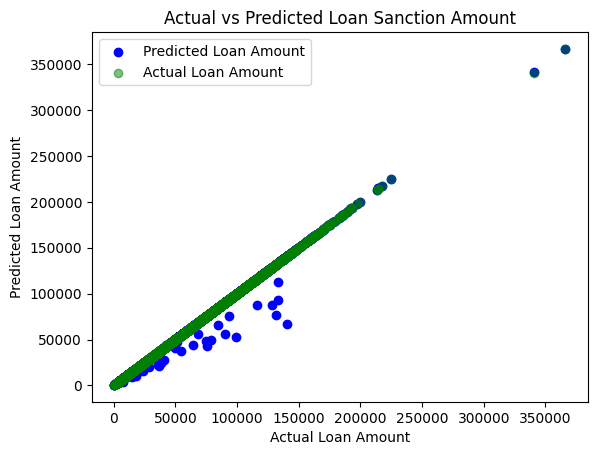

In [ ]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted Loan Amount')
plt.scatter(y_test, y_test, color='green', label='Actual Loan Amount', alpha=0.5)

# Add labels and title
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Sanction Amount")

# Add legend for clarity
plt.legend()

# Show plot
plt.show()

The average absolute error between predicted and actual values is around 2290198.04. Lower MAE indicates better performance.

With an R² score of approximately 0.996, the model explains about 99.7% of the variance in the data, indicating excellent performance.

The fact that most points lie close to the diagonal line suggests that the model's predictions are very accurate.

## 2. Open discussion questions

2.1 *(1 point)* Does income or income stability have a stronger influence on the loan sanction amount? For example, analyze the data to see if a higher income or a "High" income stability rating leads to a greater loan approval amount.  

In [ ]:
# Your argument goes here
# 2.1
# Ensure columns are clean
data.columns = data.columns.str.strip()

# Correlation between Income, Income Stability, and Loan Sanction Amount
correlation_income = data[['Income (USD)', 'Loan Sanction Amount (USD)']].corr().iloc[0, 1]
correlation_stability = data[['Income Stability_Low', 'Loan Sanction Amount (USD)']].corr().iloc[0, 1]

print(f"Correlation between Income and Loan Sanction Amount: {correlation_income}")
print(f"Correlation between Income Stability and Loan Sanction Amount: {correlation_stability}")

# Regression analysis for Income and Income Stability
X = data[["Income (USD)", "Income Stability_Low"]]
y = data["Loan Sanction Amount (USD)"]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Output the intercept and coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Correlation between Income and Loan Sanction Amount: 0.3928966123705379
Correlation between Income Stability and Loan Sanction Amount: -0.07096928592660076
Intercept: 35560.52766597163
Coefficients: [ 8.38405785e+00 -1.18239021e+04]


In term of correlation, income has a stronger influence on the loan sanction amount.

When we run the linear regression again, it is obvious that the coefficient of Income is much higher than Income Stability.

2.2 *(1 point)* Is there a significant difference in loan amounts based on property location? For example, compare the average loan amounts for properties in rural, urban, and semi-urban locations.  
    

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/house_loan.csv')
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


Property Location
Rural         46637.898995
Semi-Urban    46330.675163
Urban         46498.496942
Name: Loan Sanction Amount (USD), dtype: float64


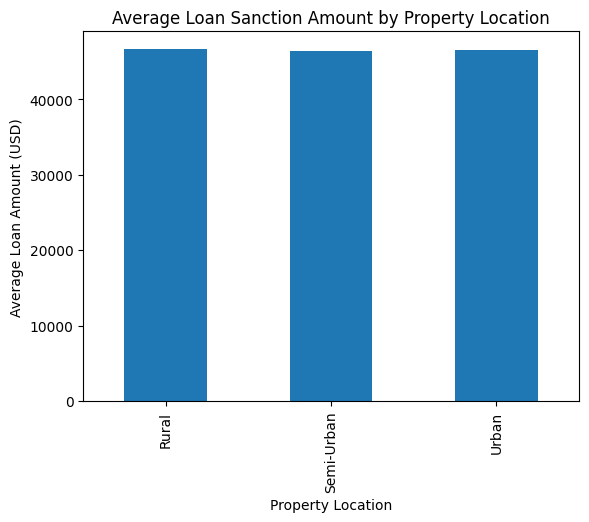

In [ ]:
# Your argument goes here
# 2.2
location_loan_mean = data.groupby("Property Location")["Loan Sanction Amount (USD)"].mean()

print(location_loan_mean)

# Visualization of loan amount differences
location_loan_mean.plot(kind='bar', title='Average Loan Sanction Amount by Property Location', ylabel='Average Loan Amount (USD)', xlabel='Property Location')
plt.show()

Based on the bar chat and the mean values, it is seem that there are no significant difference between the three locations.

2.3 *(1 point)* Is there a gender bias in loan approvals? For example, investigate if there is a difference in average loan amounts offered to male and female applicants.  


Gender
F    46373.629432
M    46601.027222
Name: Loan Sanction Amount (USD), dtype: float64


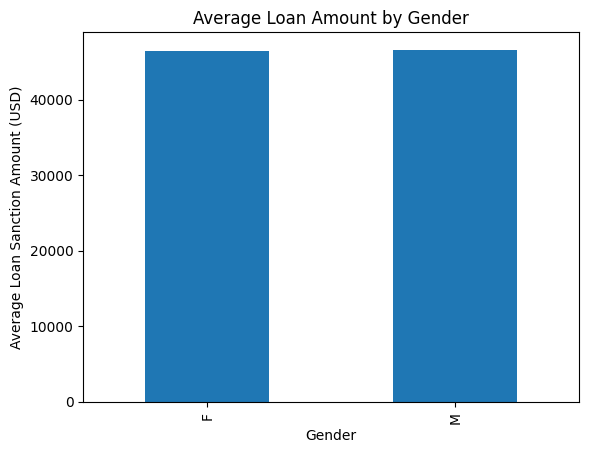

In [ ]:
# Your argument goes here
# 2.3
gender_loan_means = data.groupby('Gender')['Loan Sanction Amount (USD)'].mean()
print(gender_loan_means)

# Plot the differences
gender_loan_means.plot(kind='bar')
plt.title('Average Loan Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Loan Sanction Amount (USD)')
plt.show()

In [ ]:
Based on the bar chat and the mean values, it is seem that there are no significant difference between the genders.

2.4 *(1 point)* Are there any new features you could create from the existing data (e.g., loan-to-value ratio) that might be useful for analyzing loan amounts?  


In [ ]:
# Your argument goes here
# 2.4
data['LTV Ratio'] = data['Loan Sanction Amount (USD)'] / data['Property Price']

# Check the new feature
print(data[['Loan Sanction Amount (USD)', 'Property Price', 'LTV Ratio']].head())

   Loan Sanction Amount (USD)  Property Price  LTV Ratio
0                21026.420753        59641.82   0.352545
1                60595.183366       179858.51   0.336905
2                39181.648002       117297.62   0.334036
3               128497.710865       354417.72   0.362560
4                39386.919336        82049.80   0.480037


In [ ]:
data['LTV Ratio'].describe()

,LTV Ratio
count,47297.000000
mean,0.345244
std,0.052109
min,0.023771
25%,0.327198
50%,0.338941
75%,0.350858
max,1.184432


In [ ]:
Based on the description table, the LTV ration usually fall into around 35% of the property price. While there exist an really speacial outliners, which are 2% anf 118%.

2.5 *(1 point)* Beyond loan amount prediction, what other insights can be extracted or predicted from this dataset? For example, explore possibilities of using the data to understand borrower behavior, property market trends, or develop targeted marketing strategies.  

Other insights might include:

- Borrower segmentation: Based on income, gender, or location, different marketing strategies or loan products can be targeted.
- Property market trends: Analysis of property price trends in different locations.
- Predicting borrower behavior: Can use models to predict the likelihood of default, based on property price, income, or stability.


Property Location
Rural         135221.274462
Semi-Urban    134988.715634
Urban         135062.245619
Name: Property Price, dtype: float64


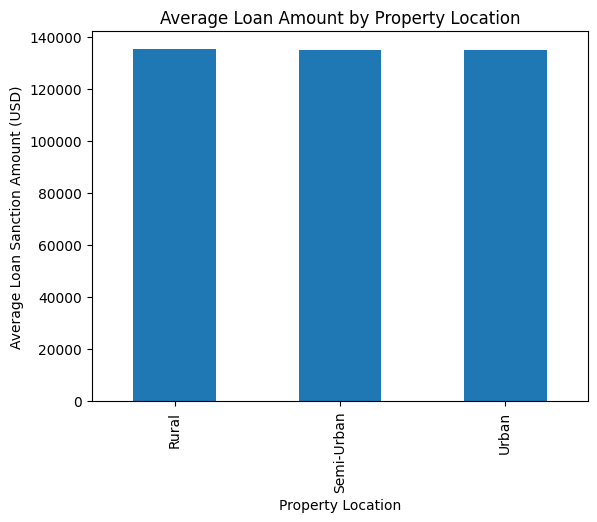

In [ ]:
# Property market trends: Analysis of property price trends in different locations.
# 2.5
gender_loan_means = data.dropna(subset=['Property Price']).groupby('Property Location')['Property Price'].mean()

# Print the grouped means
print(gender_loan_means)

# Plot the differences (Note: Adjust the title and labels according to the actual context)
gender_loan_means.plot(kind='bar')
plt.title('Average Loan Amount by Property Location')
plt.xlabel('Property Location')
plt.ylabel('Average Loan Sanction Amount (USD)')
plt.show()


An another insight taht I can take from the database is the change of property price in different locations. And I see that there is no sighnificant difference. This made me feel really confused about the reliability of the dataset. Beacuse the property in the urban tend to be more unaffordable than the other areas.
